FAKE REVIEW DETECTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("fake reviews dataset.csv")

In [3]:
data.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [4]:
readability_data=data
readability_data.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [5]:
import pandas as pd
import textstat

# Assuming you have a DataFrame df with columns 'index', 'text_', 'label'

# Function to compute readability features
def compute_readability_features(text):
    return {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
        "coleman_liau_index": textstat.coleman_liau_index(text),
        "automated_readability_index": textstat.automated_readability_index(text),
        "smog_index": textstat.smog_index(text),
        "gunning_fog": textstat.gunning_fog(text)
    }

# Apply the readability features function to the 'text_' column
readability_features = readability_data['text_'].apply(compute_readability_features)

# Convert the features to a DataFrame
readability_df = pd.DataFrame(list(readability_features))

# Concatenate the original DataFrame with the new readability features DataFrame
readability_data = pd.concat([readability_data, readability_df], axis=1)

# Display the updated DataFrame
#print(df.head())


In [6]:
readability_data = readability_data.sample(frac=1)
readability_data.head(20)

,category,rating,label,text_,flesch_reading_ease,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,smog_index,gunning_fog
4360,Sports_and_Outdoors_5,5.0,CG,Nice product. Use it for a couple of years and...,96.69,1.9,3.15,1.7,0.0,3.40
10230,Electronics_5,4.0,CG,I hooked it up to my old AC adapter and it wor...,97.40,1.6,2.80,1.5,5.7,4.15
926,Home_and_Kitchen_5,5.0,OR,Use these every day. Convenient size and easy...,99.53,0.8,2.77,1.9,6.4,4.63
38278,Clothing_Shoes_and_Jewelry_5,2.0,OR,I found it too bulky and too hard to use for n...,90.60,4.2,3.12,3.5,0.0,7.18
38913,Clothing_Shoes_and_Jewelry_5,3.0,CG,I get lots of compliments on it and the materi...,96.01,4.2,0.46,2.7,0.0,9.29
28035,Kindle_Store_5,3.0,OR,This book was raw with emotion from page 1 and...,86.23,5.9,6.04,7.3,6.8,8.41
28182,Kindle_Store_5,3.0,CG,This cannot be read first time. The story is v...,86.40,3.8,4.73,3.3,8.0,5.54
23079,Pet_Supplies_5,2.0,OR,I'm not sure if my cat is not that bright or n...,92.22,3.6,2.94,2.8,6.7,5.78
30510,Books_5,4.0,OR,This book was long and slow to start. It seem...,87.72,3.3,5.42,3.5,8.8,7.16
14743,Movies_and_TV_5,5.0,OR,I decided to pick this boxset because of my gr...,84.27,4.6,5.61,4.8,7.2,6.25


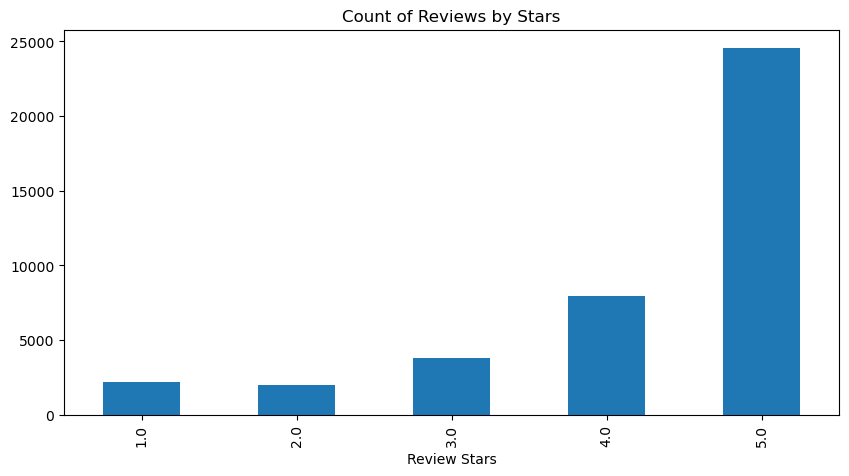

In [7]:
ax = data['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
data.shape

(40432, 4)

In [9]:
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [10]:
data.shape

(40432, 4)

In [11]:
new_data = data.drop(["category", "rating"], axis=1)
new_data.head(10)

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...
5,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,CG,They are the perfect touch for me and the only...
7,CG,These done fit well and look great. I love th...
8,CG,"Great big numbers & easy to read, the only thi..."
9,CG,My son loves this comforter and it is very wel...


In [12]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def text_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)   
    return text

[nltk_data] Downloading package stopwords to /home/Ram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
new_data['text_'] = new_data["text_"].apply(text_cleaning)

In [14]:
new_data.head(20)

,label,text_
0,CG,love well made sturdi comfort love itveri pr...
1,CG,love great upgrad origin ive mine coupl year
2,CG,pillow save back love look feel pillow
3,CG,miss inform use great product price
4,CG,nice set good qualiti set two month
5,CG,want differ flavor
6,CG,perfect touch thing wish littl space
7,CG,done fit well look great love smooth edg extra
8,CG,great big number easi read thing didnt like size
9,CG,son love comfort well made also babi


In [15]:
new_data = new_data.head(40400)
new_data = new_data.sample(frac=1)

In [16]:

new_data.to_csv("cleandata.csv", index=False)

In [17]:
cleandata = pd.read_csv("cleandata.csv")
cleandata.shape

(40400, 2)

In [18]:
cleandata['id'] = range(1, len(cleandata) + 1)
cleandata.head(10)

,label,text_,id
0,OR,product show schedul box secur charg quick t...,1
1,CG,great deal well built set headphon keep revie...,2
2,OR,littl deeper addit plot examin aftermath extre...,3
3,CG,one great potenti charact real strong femal le...,4
4,OR,delight book read look book author didnt find ...,5
5,OR,midnight couldnt put begin knew go happen didn...,6
6,CG,product exact expect kid love son love two to...,7
7,CG,want filter would lightweight comfort travel ...,8
8,OR,work advertis use insul storag shed tend get ...,9
9,CG,must anyon want tri new bat first time,10


In [19]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/Ram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
import torch
print(torch.__version__)

2.1.1+cu121


In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [24]:
scores = polarity_scores_roberta('I am very satisfied with the product')
print(scores)

{'roberta_neg': 0.0018941411, 'roberta_neu': 0.017028842, 'roberta_pos': 0.981077}


In [29]:
# data['id'] = range(1, len(data) + 1)
# res = {}
# for i, row in tqdm(data.iterrows(), total=len(data)):
#     text = row['text_']
#     myid = row['id']
#     res[myid] = sia.polarity_scores(text)
# res = {}
# for i, row in tqdm(cleandata.iterrows(), total=len(cleandata)):
#     try:
#         text = row['text_']
#         myid = row['id']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
#         roberta_result = polarity_scores_roberta(text)
#         both = {**vader_result_rename, **roberta_result}
#         res[myid] = both
#     except RuntimeError:
#         print(f'Broke for id {myid}')

  0%|          | 0/40400 [00:00<?, ?it/s]

In [30]:
import pickle

In [31]:
# with open('sentiment_dictionary.pkl', 'wb') as f:
#     pickle.dump(res, f)


In [33]:
with open('sentiment_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [34]:
vaders = pd.DataFrame(loaded_dict).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(cleandata, how='left')

In [35]:
vaders.head(30)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,label,text_
0,1,0.000,1.000,0.000,0.0000,0.068365,0.876381,0.055254,OR,product show schedul box secur charg quick t...
1,2,0.000,0.563,0.437,0.7351,0.006245,0.085218,0.908537,CG,great deal well built set headphon keep revie...
2,3,0.120,0.709,0.170,0.6249,0.161742,0.775034,0.063223,OR,littl deeper addit plot examin aftermath extre...
3,4,0.000,0.364,0.636,0.9325,0.003751,0.159528,0.836721,CG,one great potenti charact real strong femal le...
4,5,0.000,0.654,0.346,0.8155,0.010217,0.079747,0.910036,OR,delight book read look book author didnt find ...
5,6,0.000,0.784,0.216,0.5106,0.334287,0.551771,0.113942,OR,midnight couldnt put begin knew go happen didn...
6,7,0.000,0.418,0.582,0.9821,0.003792,0.017355,0.978853,CG,product exact expect kid love son love two to...
7,8,0.000,0.529,0.471,0.8271,0.008941,0.309537,0.681522,CG,want filter would lightweight comfort travel ...
8,9,0.000,1.000,0.000,0.0000,0.099801,0.826389,0.073810,OR,work advertis use insul storag shed tend get ...
9,10,0.000,0.843,0.157,0.0772,0.049163,0.892427,0.058410,CG,must anyon want tri new bat first time


In [38]:
vaders['roberta_compound'] = vaders.apply(lambda row: row['roberta_pos'] - row['roberta_neg'], axis=1)
vaders = vaders[['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'roberta_compound', 'label', 'text_']]
vaders.head(10)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound,label,text_
0,1,0.00,1.000,0.000,0.0000,0.068365,0.876381,0.055254,-0.013111,OR,product show schedul box secur charg quick t...
1,2,0.00,0.563,0.437,0.7351,0.006245,0.085218,0.908537,0.902291,CG,great deal well built set headphon keep revie...
2,3,0.12,0.709,0.170,0.6249,0.161742,0.775034,0.063223,-0.098519,OR,littl deeper addit plot examin aftermath extre...
3,4,0.00,0.364,0.636,0.9325,0.003751,0.159528,0.836721,0.832970,CG,one great potenti charact real strong femal le...
4,5,0.00,0.654,0.346,0.8155,0.010217,0.079747,0.910036,0.899820,OR,delight book read look book author didnt find ...
5,6,0.00,0.784,0.216,0.5106,0.334287,0.551771,0.113942,-0.220345,OR,midnight couldnt put begin knew go happen didn...
6,7,0.00,0.418,0.582,0.9821,0.003792,0.017355,0.978853,0.975061,CG,product exact expect kid love son love two to...
7,8,0.00,0.529,0.471,0.8271,0.008941,0.309537,0.681522,0.672581,CG,want filter would lightweight comfort travel ...
8,9,0.00,1.000,0.000,0.0000,0.099801,0.826389,0.073810,-0.025992,OR,work advertis use insul storag shed tend get ...
9,10,0.00,0.843,0.157,0.0772,0.049163,0.892427,0.058410,0.009248,CG,must anyon want tri new bat first time


In [39]:
#for vader sentiment analysis
x = vaders["roberta_compound"]
y = vaders["label"]

#for readability features
# x = readability_data[['flesch_reading_ease', 'flesch_kincaid_grade', 'coleman_liau_index', 'automated_readability_index', 'smog_index', 'gunning_fog']]
# y = readability_data['label']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
#for Tfidf
# vectorization = TfidfVectorizer()
# xv_train = vectorization.fit_transform(x_train)
# xv_test = vectorization.transform(x_test)

#for sentiment analysis
import numpy as np
xv_train_np = np.array(x_train).reshape(-1, 1)
xv_test_np = np.array(x_test).reshape(-1, 1)

#for readability features
# import numpy as np
# xv_train_np = np.array(x_train)
# xv_test_np = np.array(x_test)

Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
LR = LogisticRegression()
#LR.fit(xv_train, y_train)
LR.fit(xv_train_np, y_train)

LogisticRegression()

In [45]:
#LR.score(xv_test, y_test)
LR.score(xv_test_np, y_test)

0.5902970297029703

In [46]:
#pred_LR = LR.predict(xv_test)
pred_LR = LR.predict(xv_test_np)

In [47]:
xv_test_np

array([[6.04025798e-01],
       [3.36326659e-04],
       [9.23042695e-01],
       ...,
       [2.23727174e-01],
       [6.81843735e-01],
       [1.87588492e-01]])

In [48]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

          CG       0.58      0.67      0.62      5051
          OR       0.61      0.51      0.55      5049

    accuracy                           0.59     10100
   macro avg       0.59      0.59      0.59     10100
weighted avg       0.59      0.59      0.59     10100



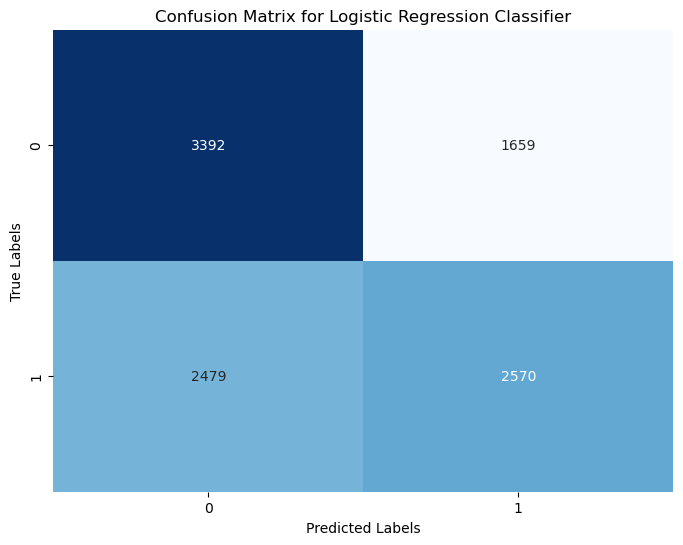

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_LR)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT = DecisionTreeClassifier()
#DT.fit(xv_train, y_train)
DT.fit(xv_train_np, y_train)

DecisionTreeClassifier()

In [52]:
#pred_dt = DT.predict(xv_test)
pred_dt = DT.predict(xv_test_np)

In [53]:
#DT.score(xv_test, y_test)
DT.score(xv_test_np, y_test)

0.5261386138613862

In [54]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

          CG       0.53      0.53      0.53      5051
          OR       0.53      0.53      0.53      5049

    accuracy                           0.53     10100
   macro avg       0.53      0.53      0.53     10100
weighted avg       0.53      0.53      0.53     10100



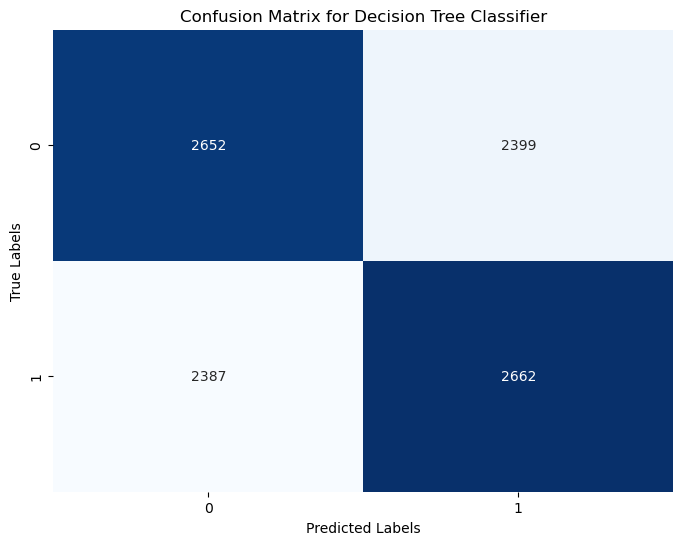

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train_np, y_train)

RandomForestClassifier(random_state=0)

In [58]:
pred_rfc = RFC.predict(xv_test_np)

In [59]:
RFC.score(xv_test_np, y_test)

0.5264356435643565

In [60]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

          CG       0.53      0.52      0.53      5051
          OR       0.53      0.53      0.53      5049

    accuracy                           0.53     10100
   macro avg       0.53      0.53      0.53     10100
weighted avg       0.53      0.53      0.53     10100



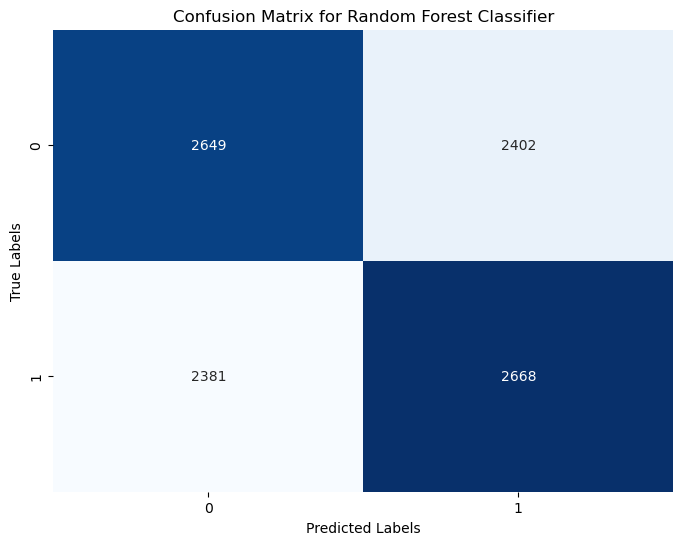

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

Support Vector Machine Classifier

In [62]:
from sklearn.svm import SVC

In [63]:
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(xv_train_np, y_train)

SVC(kernel='linear', random_state=0)

In [64]:
pred_svm = SVM.predict(xv_test_np)

In [65]:
SVM.score(xv_test_np, y_test)

0.5789108910891089

In [66]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

          CG       0.56      0.70      0.62      5051
          OR       0.60      0.46      0.52      5049

    accuracy                           0.58     10100
   macro avg       0.58      0.58      0.57     10100
weighted avg       0.58      0.58      0.57     10100



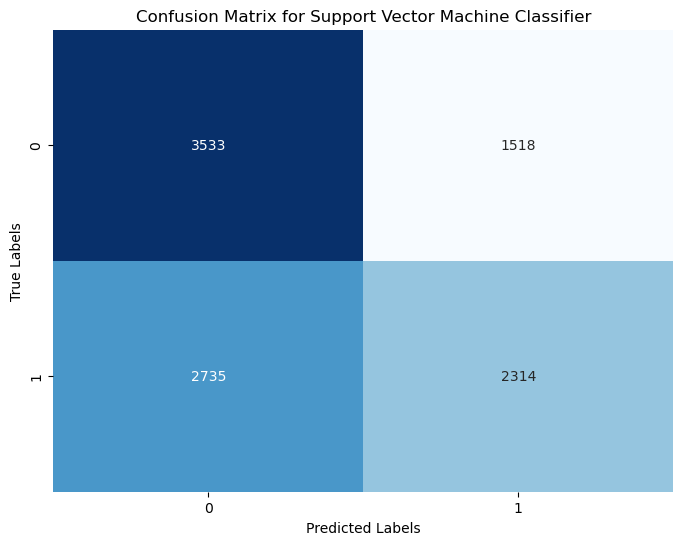

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_svm)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Support Vector Machine Classifier")
plt.show()

k-Nearest Neighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xv_train_np, y_train)

KNeighborsClassifier()

In [70]:
pred_knn = KNN.predict(xv_test_np)

In [71]:
KNN.score(xv_test_np, y_test)

0.5493069306930694

In [72]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

          CG       0.55      0.56      0.55      5051
          OR       0.55      0.54      0.55      5049

    accuracy                           0.55     10100
   macro avg       0.55      0.55      0.55     10100
weighted avg       0.55      0.55      0.55     10100



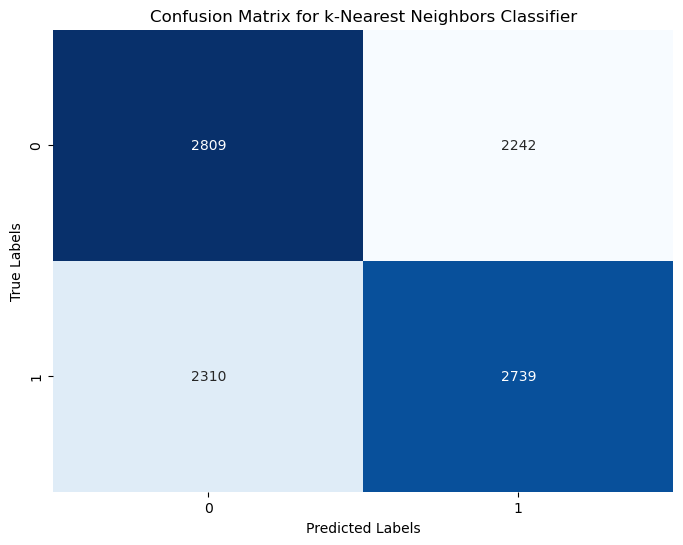

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_knn)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for k-Nearest Neighbors Classifier")
plt.show()

Naive Bayes Classifier

In [74]:
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [75]:
# NB = MultinomialNB()
# NB.fit(xv_train_np, y_train)
NB = GaussianNB()
NB.fit(xv_train_np, y_train)

GaussianNB()

In [76]:
pred_nb = NB.predict(xv_test_np)

In [77]:
NB.score(xv_test_np, y_test)

0.5865346534653465

In [78]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

          CG       0.57      0.68      0.62      5051
          OR       0.61      0.49      0.54      5049

    accuracy                           0.59     10100
   macro avg       0.59      0.59      0.58     10100
weighted avg       0.59      0.59      0.58     10100



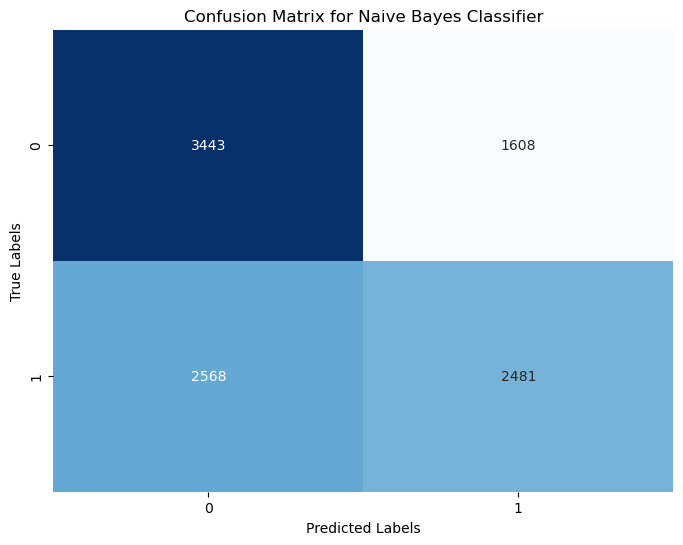

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_nb)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [ ]:
# def output_lable(n):
#     if n == 'CG':
#         return "Fake Review"
#     elif n == 'OR':
#         return "Not A Fake Review"

# def calculate_compound(scores_dict):
    
#     if 'roberta_neg' in scores_dict and 'roberta_neu' in scores_dict and 'roberta_pos' in scores_dict:
#         roberta_neg = scores_dict['roberta_neg']
#         roberta_neu = scores_dict['roberta_neu']
#         roberta_pos = scores_dict['roberta_pos']

#         # Calculate compound score
#         compound = roberta_pos - roberta_neg

#         return compound
#     else:
#         # Return a default value or handle the missing keys appropriately
#         return 0.0

# def manual_testing(review):
#     testing_review = {"text":[review]}
#     new_def_test = pd.DataFrame(testing_review)
#     #for readability features
# #     readability_features = new_def_test['text'].apply(compute_readability_features)
# #     # Convert the features to a DataFrame
# #     new_xv_test_array = pd.DataFrame(list(readability_features))
    
#     #for tfidf and sentiment analysis
#     new_def_test["text"] = new_def_test["text"].apply(text_cleaning) 
#     new_x_test = new_def_test["text"]
#     #new_xv_test = vectorization.transform(new_x_test)
    
#     #vader
#     #new_xv_test = new_x_test.apply(lambda x: sia.polarity_scores(x)['compound'])
    
#     #roberta
#     scores_dict = new_x_test.apply(lambda x: polarity_scores_roberta(x))
#     new_xv_test = calculate_compound(scores_dict)
#     new_xv_test_array = np.array(new_xv_test).reshape(1, -1)

#     pred_LR = LR.predict(new_xv_test_array)
#     pred_DT = DT.predict(new_xv_test_array)
#     pred_RFC = RFC.predict(new_xv_test_array)
#     pred_SVM = SVM.predict(new_xv_test_array)
#     pred_KNN = KNN.predict(new_xv_test_array)
#     pred_NB = NB.predict(new_xv_test_array)
#     return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {} \nKNN Prediction: {} \nNB Prediction: {} ".format(output_lable(pred_LR[0]), 
#                                                                                                               output_lable(pred_DT[0]),
#                                                                                                               output_lable(pred_RFC[0]),
#                                                                                                               output_lable(pred_SVM[0]),
#                                                                                                               output_lable(pred_KNN[0]),output_lable(pred_NB[0])))





import pandas as pd
import numpy as np

# Define emoji dictionary with sentiment scores
emoji_dict = {
    "😍": 0.678,
    "😭": -0.093,
    "😘": 0.701,
    "😊": 0.644,
    "👌": 0.563,
    "💕": 0.632,
    "👏": 0.520,
    "👍": 0.521,
    "😩": -0.368,
    "🙏": 0.417,
    "🙌": 0.559,
    "💪": 0.555,
    "💖": 0.712,
    "😒": -0.374,
    "😔": -0.146,
    "💗": 0.657,
    "😡": -0.173,
    "😎": 0.491,
    "😢": 0.007,
    "💞": 0.739,
    "😤": -0.209,
    "💩": -0.116,
    "👎": -0.224
}

def output_label(text_label, emoji_score):
    """Determine the output label based on text and emoji sentiment scores"""
    if text_label == 'CG' and emoji_score > 0.5:
        return "Fake Review"
    elif text_label == 'OR' and emoji_score < 0.5:
        return "Fake Review"
    elif text_label == 'CG' or emoji_score > 0.5:
        return "Fake Review"
    else:
        return "Not A Fake Review"

def calculate_compound(scores_dict):
    """Calculate compound score from sentiment scores"""
    if 'roberta_neg' in scores_dict and 'roberta_neu' in scores_dict and 'roberta_pos' in scores_dict:
        roberta_neg = scores_dict['roberta_neg']
        roberta_neu = scores_dict['roberta_neu']
        roberta_pos = scores_dict['roberta_pos']

        # Calculate compound score
        compound = roberta_pos - roberta_neg

        return compound
    else:
        # Return a default value or handle the missing keys appropriately
        return 0.0

def manual_testing(review):
    """Perform manual testing on the review"""
    emojis = [char for char in review if char in emoji_dict]
    text = ''.join([char for char in review if char not in emoji_dict])
    
    # Process text
    testing_review = {"text": [text]}
    new_def_test = pd.DataFrame(testing_review)
    new_def_test["text"] = new_def_test["text"].apply(text_cleaning) 
    new_x_test = new_def_test["text"]
    scores_dict = new_x_test.apply(lambda x: polarity_scores_roberta(x))
    new_xv_test = calculate_compound(scores_dict)
    new_xv_test_array = np.array(new_xv_test).reshape(1, -1)

    pred_LR = LR.predict(new_xv_test_array)
    pred_DT = DT.predict(new_xv_test_array)
    pred_RFC = RFC.predict(new_xv_test_array)
    pred_SVM = SVM.predict(new_xv_test_array)
    pred_KNN = KNN.predict(new_xv_test_array)
    pred_NB = NB.predict(new_xv_test_array)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {} \nKNN Prediction: {} \nNB Prediction: {} ".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0]),
                                                                                                              output_lable(pred_KNN[0]),output_lable(pred_NB[0])))

    
    # Process emojis
    emoji_scores = [emoji_dict.get(emoji, 0) for emoji in emojis]
    emoji_score = np.mean(emoji_scores)
    
    # Determine output label
    output_label_text = "OR" if text_compound_score >= 0 else "CG"
    output_label_final = output_label(output_label_text, emoji_score)
    
    # Display results
    if not emojis:
        return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {} \nKNN Prediction: {} \nNB Prediction: {} ".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0]),
                                                                                                              output_lable(pred_KNN[0]),output_lable(pred_NB[0])))
    else:
        return print("Text Output: {}\nEmoji Score: {}\nFinal Output: {}".format(output_lable(output_label_text), 
                                                                             emoji_score,
                                                                             output_label_final))


In [ ]:
review = input()
manual_testing(review)